In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression, LinearRegression
import random

# np.random.seed(3498734)

In [2]:
def jitter(arr):
    return arr + np.random.randn(len(arr)) * .02

near_zeros_p = jitter(np.zeros(51))
near_zeros = jitter(np.zeros(50))
near_ones = jitter(np.ones(50))

### Import the data

In [3]:
data = datasets.load_iris()
iris = pd.DataFrame(data.data,columns=data.feature_names)
iris['species'] = data.target
iris = iris.rename(columns={ 'sepal length (cm)':'sl','sepal width (cm)':'sw','petal length (cm)':'pl','petal width (cm)':'pw'})
iris.head()

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## plot petal length for versicolor and virginica

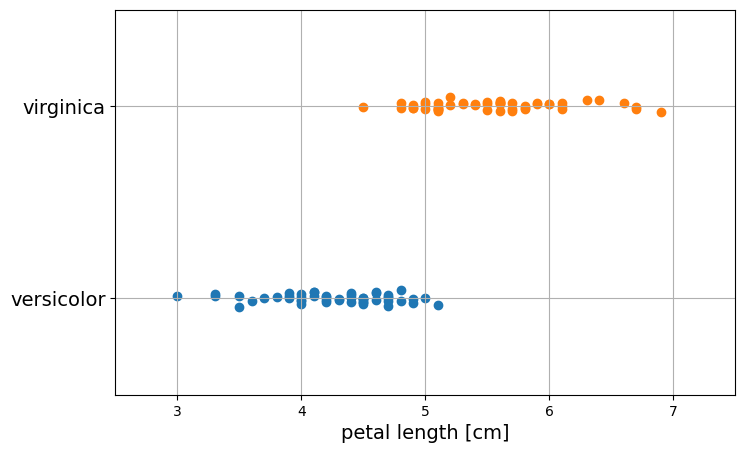

In [4]:
plt.figure(figsize=(8,5))
ax = plt.axes()
plt.scatter( iris.pl[iris.species==1], near_zeros, label=data.target_names[1] )
plt.scatter( iris.pl[iris.species==2], near_ones, label=data.target_names[2] )
plt.ylim((-0.5,1.5))
plt.xlim((2.5,7.5))
ax.set_yticks((0,1))
ax.set_yticklabels(['versicolor','virginica'],fontsize=14)
plt.xlabel('petal length [cm]',fontsize=14)
plt.grid()

## keep 2 classes

In [5]:
indclass = (iris.species==1) | (iris.species==2)
X = np.expand_dims( iris.loc[indclass,'pl'].values, axis=1 )
y = iris.loc[indclass,'species'].values - 1

X0 = X[y==0]
y0 = y[y==0]
X1 = X[y==1]
y1 = y[y==1]

## 2class, 1input linear regression

Threshold = 4.906


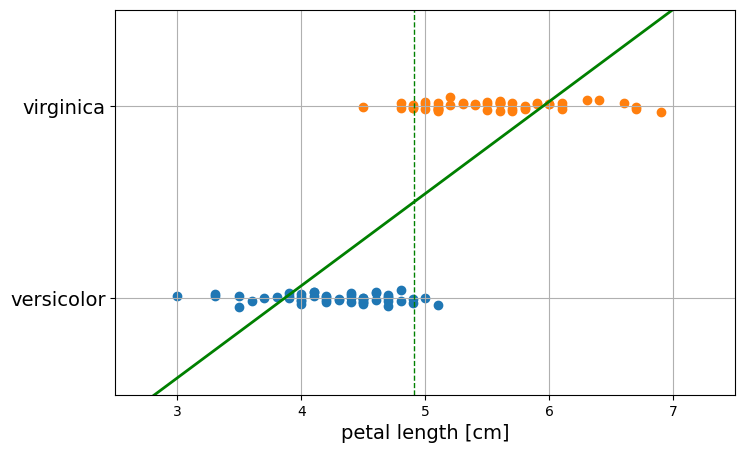

In [6]:
linreg = LinearRegression().fit(X, y)
linreg_thresh = (0.5 - linreg.intercept_)/linreg.coef_[0]

print("Threshold = " + str(linreg_thresh))

# plot
xlim  = (2.5,7.5)
pl = np.expand_dims( np.linspace(xlim[0],xlim[1]), axis=1 )
plt.figure(figsize=(8,5))
ax = plt.axes()
plt.vlines(linreg_thresh, -0.5, 1.5, colors='green',linestyle='--', linewidth=1)
plt.scatter( X0, near_zeros, label=data.target_names[1] )
plt.scatter( X1, near_ones, label=data.target_names[2] )
plt.plot(pl, linreg.predict(pl),color='green',linewidth=2) 
plt.xlim(xlim)
plt.ylim((-0.5,1.5))
ax.set_yticks((0,1))
ax.set_yticklabels(['versicolor','virginica'],fontsize=14)
plt.xlabel('petal length [cm]',fontsize=14)
plt.grid()

## add an outlier, do linear regression


In [7]:
Xo = np.expand_dims( np.append(X,12), axis=1 )
yo = np.append(y, 1)
Xo0 = Xo[yo==0]
Xo1 = Xo[yo==1]

Threshold = 4.9600221177771635


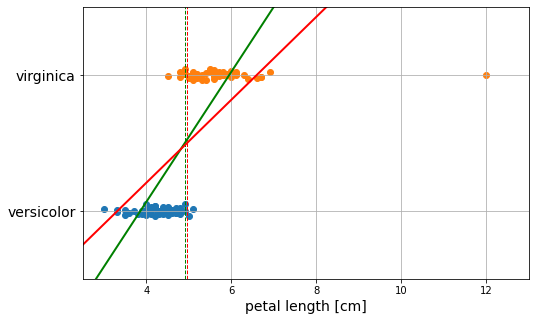

In [8]:
linrego = LinearRegression().fit(Xo, yo)
linreg_thresho = (0.5 - linrego.intercept_)/linrego.coef_[0]

print("Threshold = " + str(linreg_thresho))

xlim = (2.5,13)
pl = np.expand_dims( np.linspace(xlim[0],xlim[1]), axis=1 )


plt.figure(figsize=(8,5))
ax = plt.axes()
plt.vlines(linreg_thresh, -0.5, 1.5, colors='green',linestyle='--', linewidth=1)
plt.vlines(linreg_thresho, -0.5, 1.5, colors='red',linestyle='--', linewidth=1)
plt.scatter( Xo0, near_zeros, label=data.target_names[1] )
plt.scatter( Xo1, np.append(near_ones,1), label=data.target_names[2] )
plt.plot(pl, linreg.predict(pl),color='green',linewidth=2)
plt.plot(pl, linrego.predict(pl),color='red',linewidth=2)
plt.xlim(xlim)
plt.ylim((-0.5,1.5))
ax.set_yticks((0,1))
ax.set_yticklabels(['versicolor','virginica'],fontsize=14)
plt.xlabel('petal length [cm]',fontsize=14)
plt.grid()

In [9]:
# logistic regression
logreg = LogisticRegression().fit(X, y)
logrego = LogisticRegression().fit(Xo, yo)

logreg_thresh = -logreg.intercept_/logreg.coef_[0]
logreg_thresho = -logrego.intercept_/logrego.coef_[0]

d_log_thresh = logreg_thresh-logreg_thresho
d_lin_thresh = linreg_thresh-linreg_thresho

d_lin_thresh / d_log_thresh

array([1656884.71806644])

# VIDEO 2 ...

### MAKE THE BINNING PICTURE

In [10]:
ind = (iris.species==1) | (iris.species==2)
iris.loc[ind,'pl']
iris.loc[ind,'species']-1

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

### OVERLAP GAUSSIAN CURVES

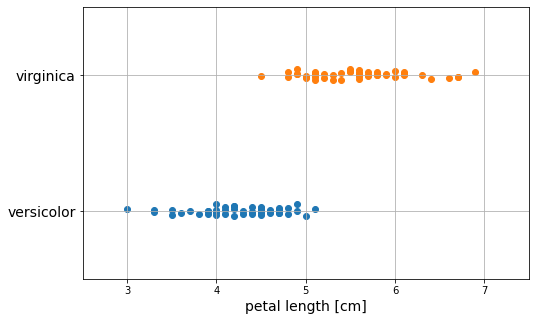

In [11]:
plt.figure(figsize=(8,5))
ax = plt.axes()
plt.scatter( iris.pl[iris.species==1], near_zeros, label=data.target_names[1] )
plt.scatter( iris.pl[iris.species==2], near_ones, label=data.target_names[2] )
plt.ylim((-0.5,1.5))
plt.xlim((2.5,7.5))
ax.set_yticks((0,1))
ax.set_yticklabels(['versicolor','virginica'],fontsize=14)
plt.xlabel('petal length [cm]',fontsize=14)
plt.grid()

# -------------------------------------------------------

Text(0, 0.5, 'petal width')

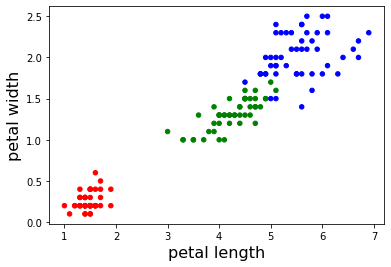

In [12]:
colors = {0:'red', 1:'green', 2:'blue'}
a = iris.plot(kind='scatter',x='pl',y='pw',c=iris['species'].map(colors))
a.set_xlabel('petal length',fontsize=16)
a.set_ylabel('petal width',fontsize=16)

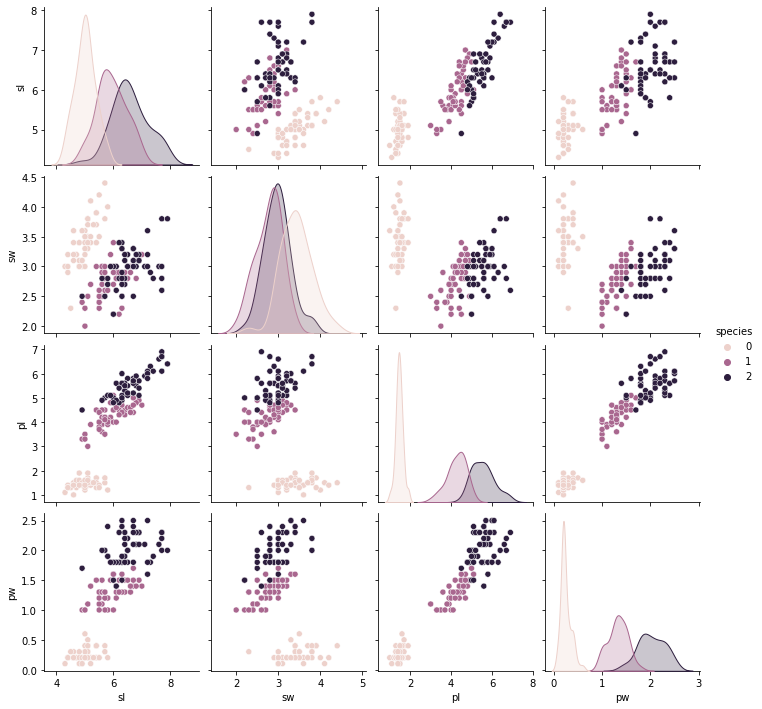

In [13]:
sns.pairplot(iris,hue='species')

# PLOTTIG DECISION BOUNDARIES (FROM JOSH)

In [14]:
# logistic_regression_model = LogisticRegression(multi_class = 'ovr')
# logistic_regression_model = logistic_regression_model.fit(iris[["pl", "pw"]], iris["species"])


# sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

# xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
#                      np.arange(0, 2.8, 0.02))


# Z_string = logistic_regression_model.predict(np.c_[xx.ravel(), yy.ravel()])
# categories, Z_int = np.unique(Z_string, return_inverse=True)
# Z_int = Z_int 
# Z_int = Z_int.reshape(xx.shape)
# cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
# sns.scatterplot(data = iris, x = "pl", y="pw", hue="species")
# plt.xlim(0, 7);
# plt.ylim(0, 2.8);
# plt.savefig("iris_decision_boundaries_logistic_regression_no_boundaries.png", dpi=300, bbox_inches = "tight")

